In [1]:
#Assignment module 6 Simple linear regression sorting_time data 

# lets import files Delivery_time and calories 
del <- read.csv(file.choose())

In [2]:
del ########################### DATA pre processing #############################################################

Delivery.Time,Sorting.Time
<dbl>,<int>
21.00,10
13.50,4
19.75,6
24.00,9
29.00,10
15.35,6
19.00,7
9.50,3
17.90,10


In [3]:
# structure of data frame , it is the data relating to weight and calories 
str(del) # data type is integer 
attach(del)
summary(del)


'data.frame':	21 obs. of  2 variables:
 $ Delivery.Time: num  21 13.5 19.8 24 29 ...
 $ Sorting.Time : int  10 4 6 9 10 6 7 3 10 9 ...


 Delivery.Time    Sorting.Time  
 Min.   : 8.00   Min.   : 2.00  
 1st Qu.:13.50   1st Qu.: 4.00  
 Median :17.83   Median : 6.00  
 Mean   :16.79   Mean   : 6.19  
 3rd Qu.:19.75   3rd Qu.: 8.00  
 Max.   :29.00   Max.   :10.00  

In [4]:
colnames(del) # Viewing and checking column names 

[1] "Delivery.Time" "Sorting.Time"

In [5]:
# Rename column where names is "Sepal.Length"
names(del)[names(del) == 'Delivery.Time'] <- "Delivery_time" # renaming column name for convinience
names(del)[names(del) == 'Sorting.Time'] <- "Sorting_time"
del
attach(del) # afte changing attaching value

Delivery_time,Sorting_time
<dbl>,<int>
21.00,10
13.50,4
19.75,6
24.00,9
29.00,10
15.35,6
19.00,7
9.50,3
17.90,10


[1] 0.3267026

[1] 0.04368099

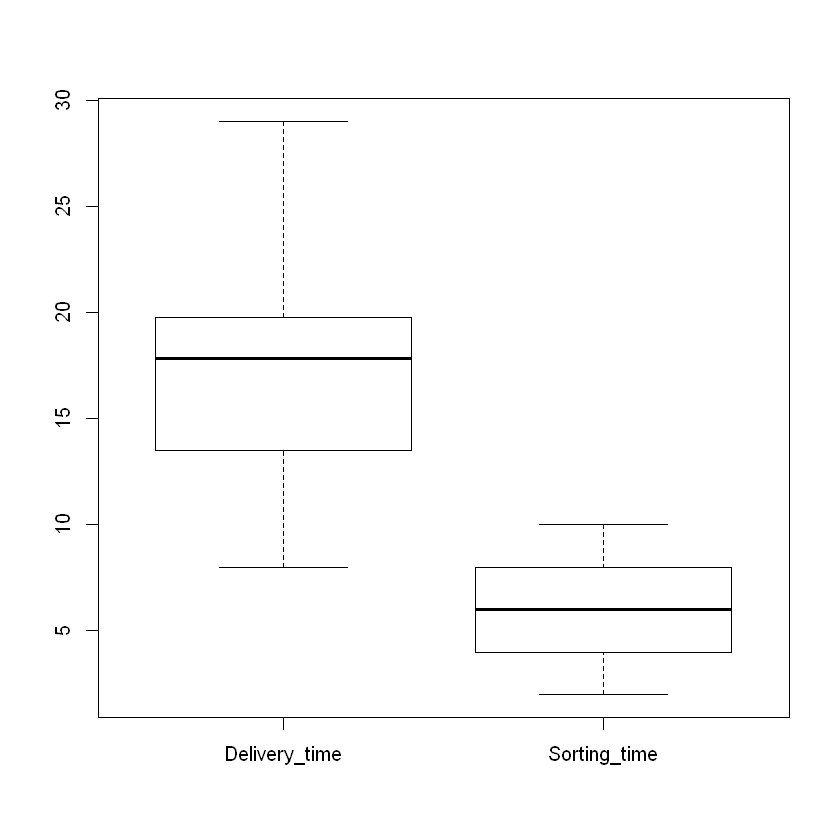

In [6]:
# priliminary investigation for outliers 
boxplot(del)
# as there is no outliers we can see 
library(moments) # both aer positive skewness 
skewness(Delivery_time)
skewness(Sorting_time)

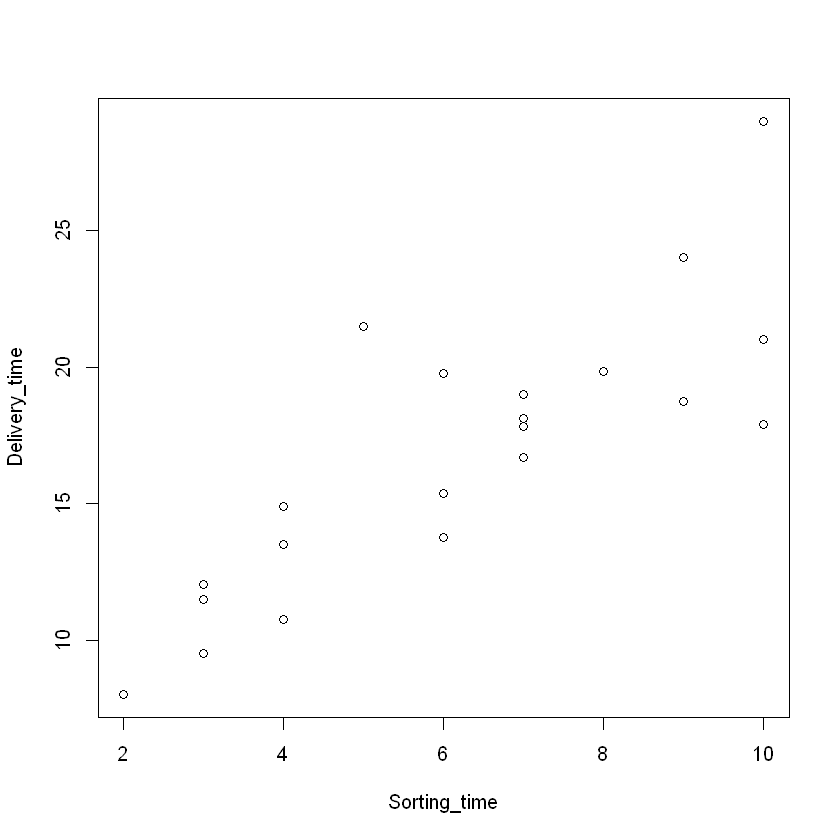

In [7]:
plot(Sorting_time,Delivery_time)


In [8]:
# Pre porcessing data checking for NA values 
dim(del)
str(del)  # data frame 
sum(is.na(del)==T) # as there is no NA value if 0 there is no na value exist

mean(Delivery_time) # checking if perfectly mean is coming or not 
mean(Sorting_time) # mean is proof there is no NA value

[1] 21  2

'data.frame':	21 obs. of  2 variables:
 $ Delivery_time: num  21 13.5 19.8 24 29 ...
 $ Sorting_time : int  10 4 6 9 10 6 7 3 10 9 ...


[1] 0

[1] 16.79095

[1] 6.190476

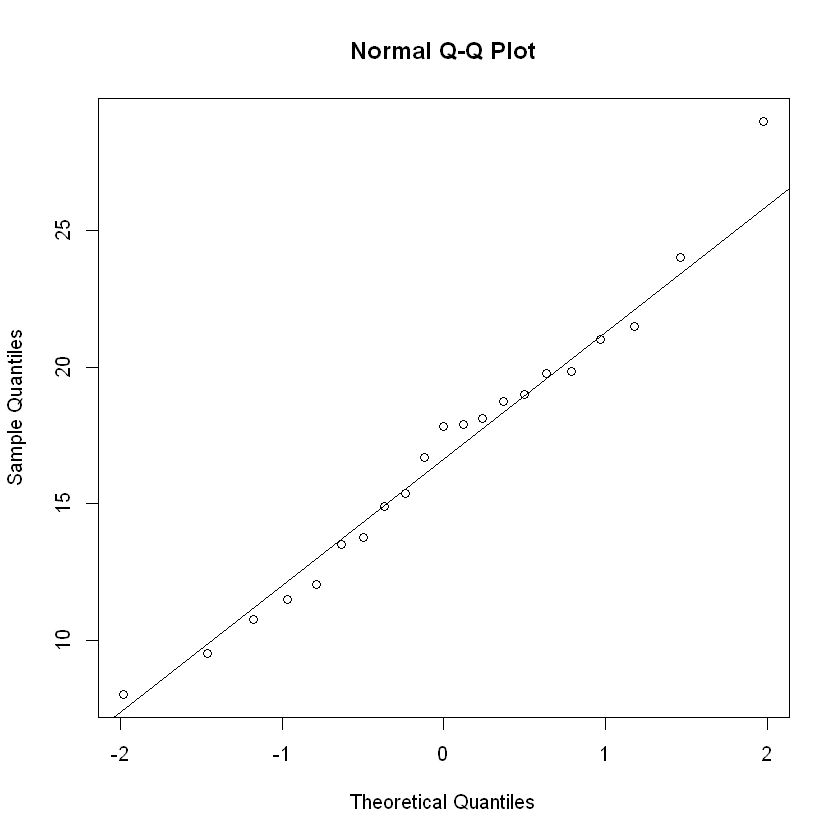

[1] 0.8259973

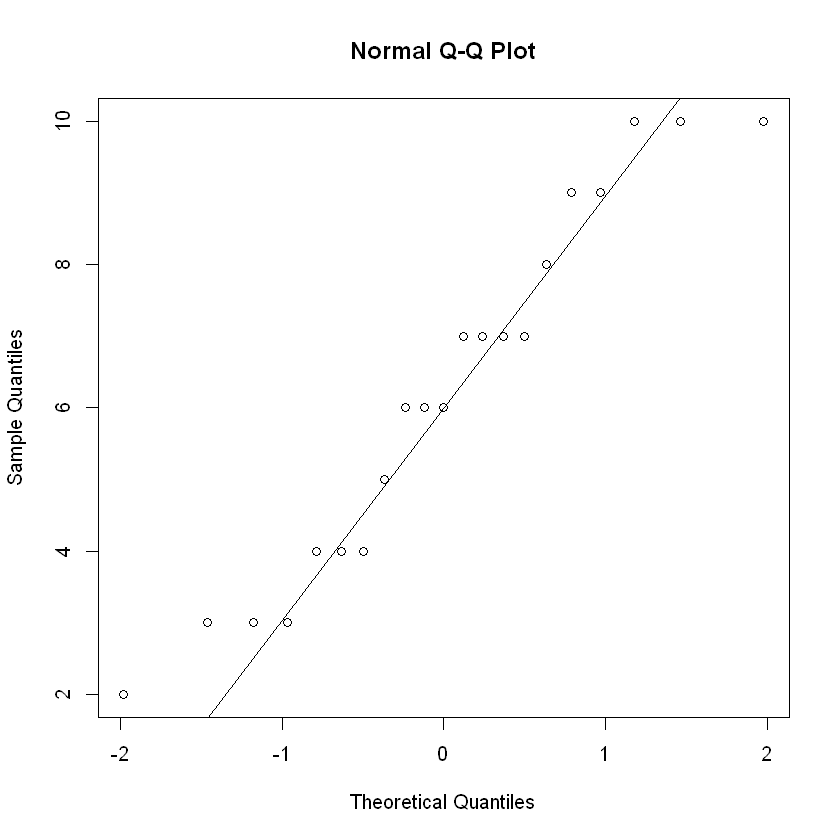

In [9]:
# Just checking how normally data is distributed
qqnorm(Delivery_time)
qqline(Delivery_time)
qqnorm(Sorting_time)
qqline(Sorting_time)
cor(Delivery_time,Sorting_time) # correlation is 0.825997260795533

In [10]:
#sample split data into train test 50:50 ratio as dat ais less
library(ISLR)
attach(del)
smp_siz = floor(0.50*nrow(del))  # creates a value for dividing the data into train and test. In this case the value is defined as 75% of the number of rows in the dataset
smp_siz  # shows the value of the sample size

The following objects are masked from del (pos = 5):

    Delivery_time, Sorting_time




[1] 10

In [11]:
set.seed(123)   # set seed to ensure you always have same random numbers generated
train_ind = sample(seq_len(nrow(del)),size = smp_siz)  # Randomly identifies therows equal to sample size ( defined in previous instruction) from  all the rows of Smarket dataset and stores the row number in train_ind
train =del[train_ind,] #creates the training dataset with row numbers stored in train_ind
test=del[-train_ind,]  # creates the test dataset excluding the row numbers mentioned in train_ind

In [12]:
test

train

,Delivery_time,Sorting_time
,<dbl>,<int>
1,21.00,10
7,19.00,7
8,9.50,3
9,17.90,10
12,10.75,4
13,16.68,7
16,14.88,4
17,13.75,6
18,18.11,7


,Delivery_time,Sorting_time
,<dbl>,<int>
15,12.03,3
19,8.00,2
14,11.50,3
3,19.75,6
10,18.75,9
2,13.50,4
6,15.35,6
11,19.83,8
5,29.00,10


[1] 2.79165

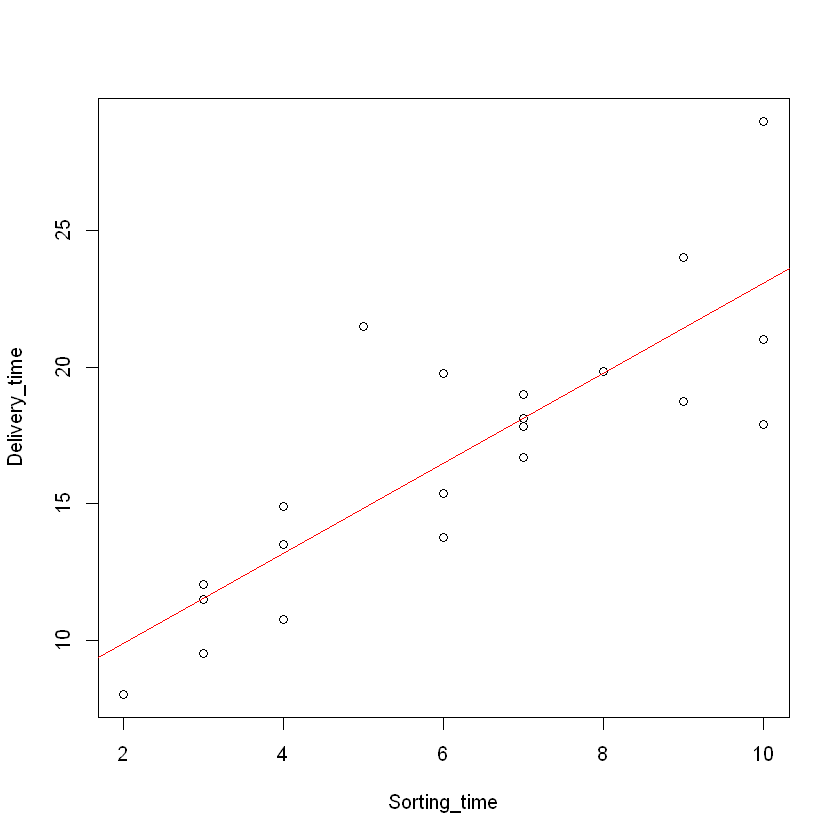

In [13]:
# we trying to fit a linear regression line  by plotting linear model 
lm <- lm(Delivery_time~Sorting_time,data=del) # linear model
rmse <- sqrt(mean(lm$residuals^2))
rmse # rmse is too high value 
plot( Sorting_time,Delivery_time) # scatter plot X is Waist and y is AT
abline(lm(Delivery_time~Sorting_time,data = del),col = 'red') # made a regression line 

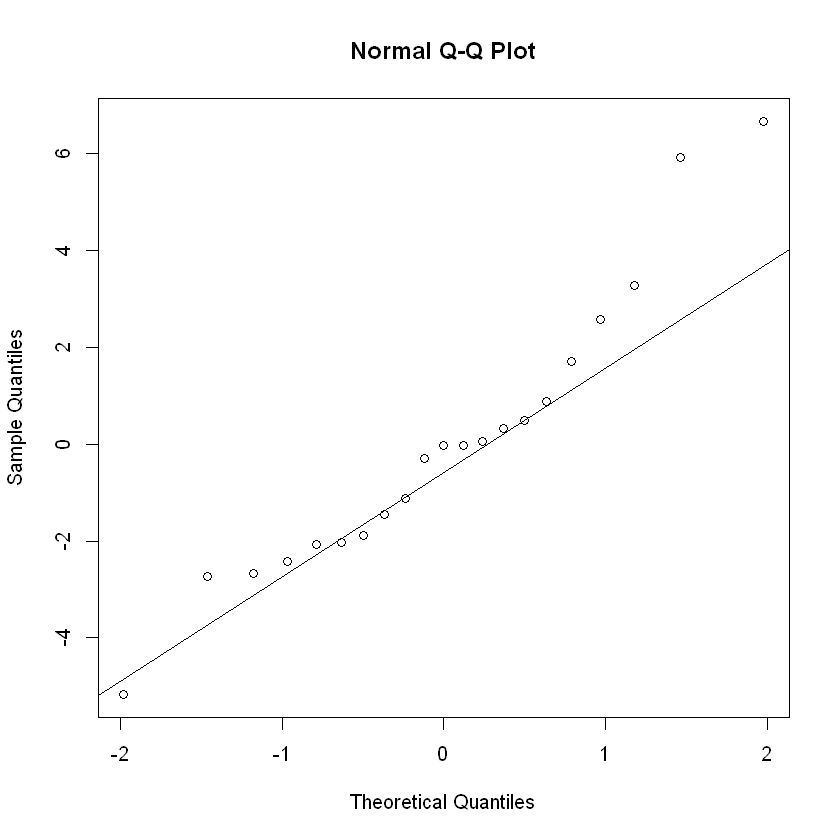

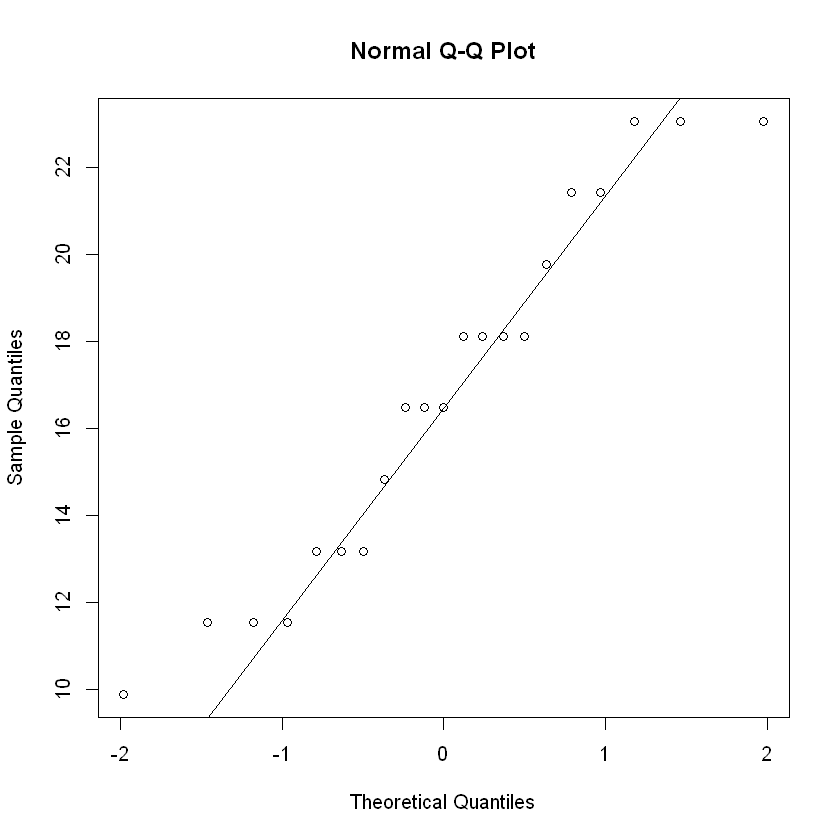

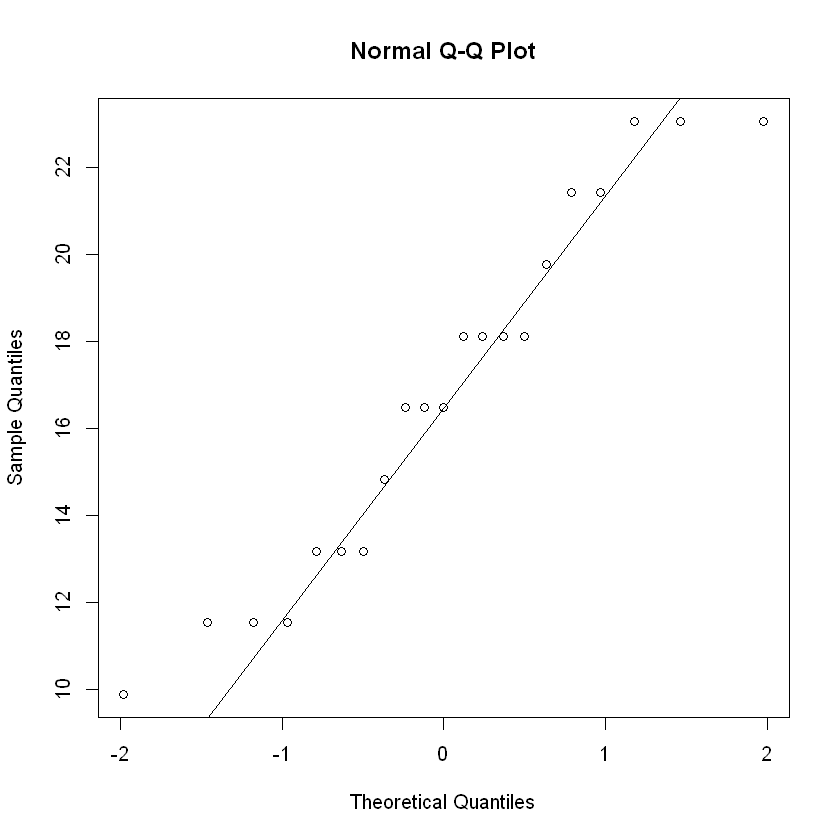

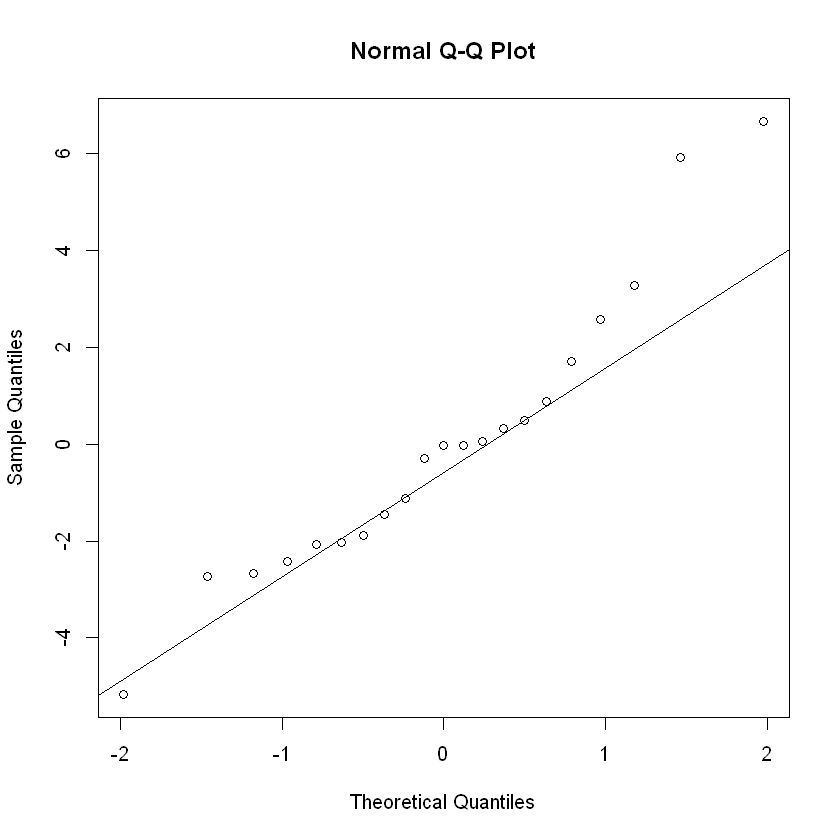

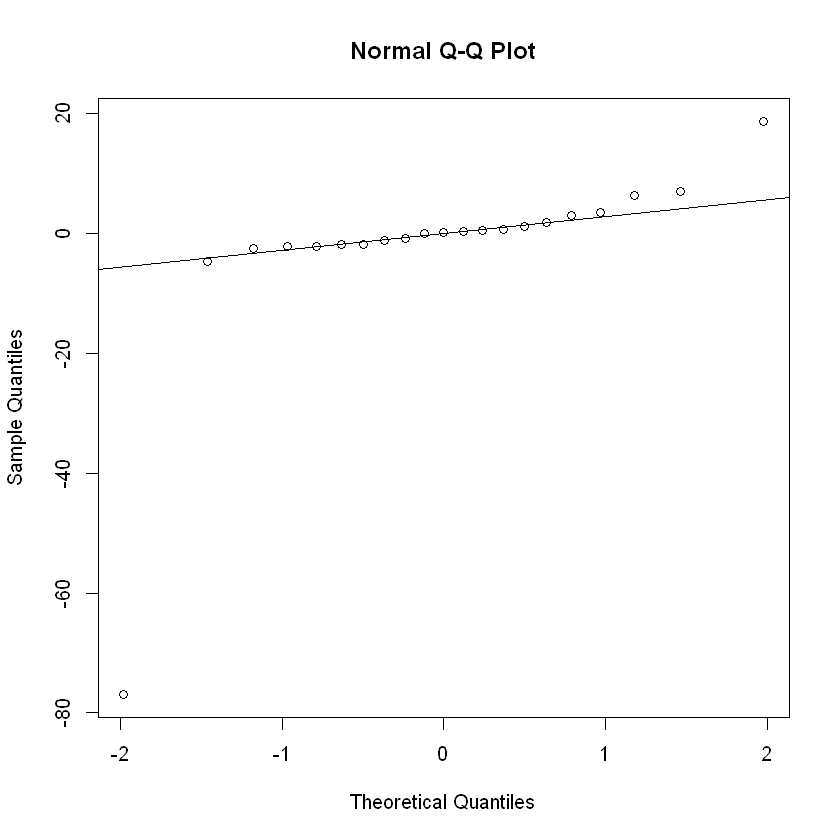

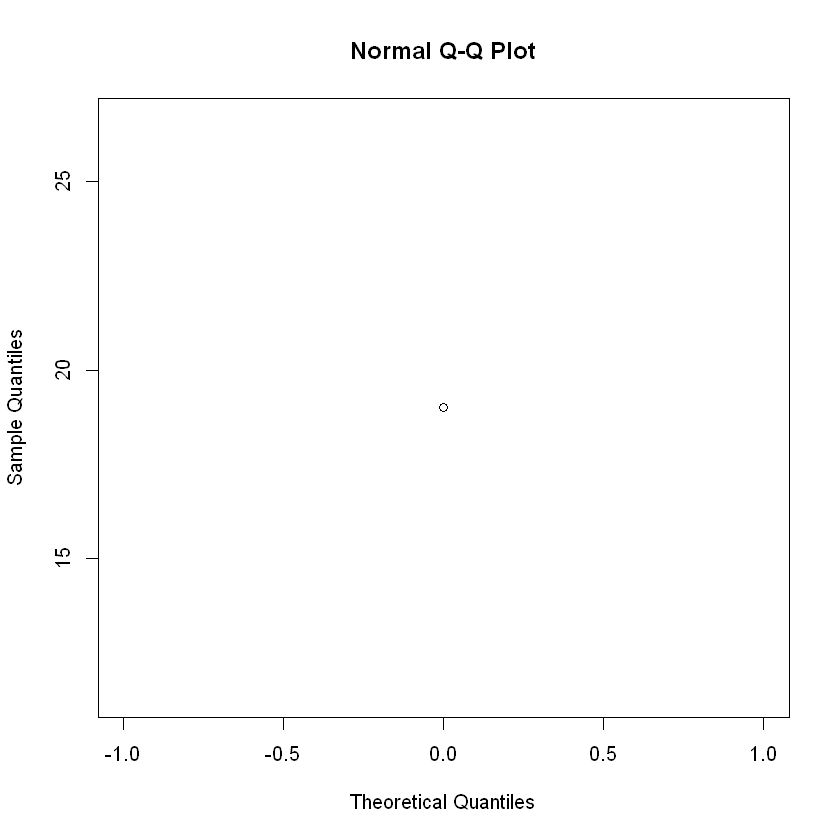

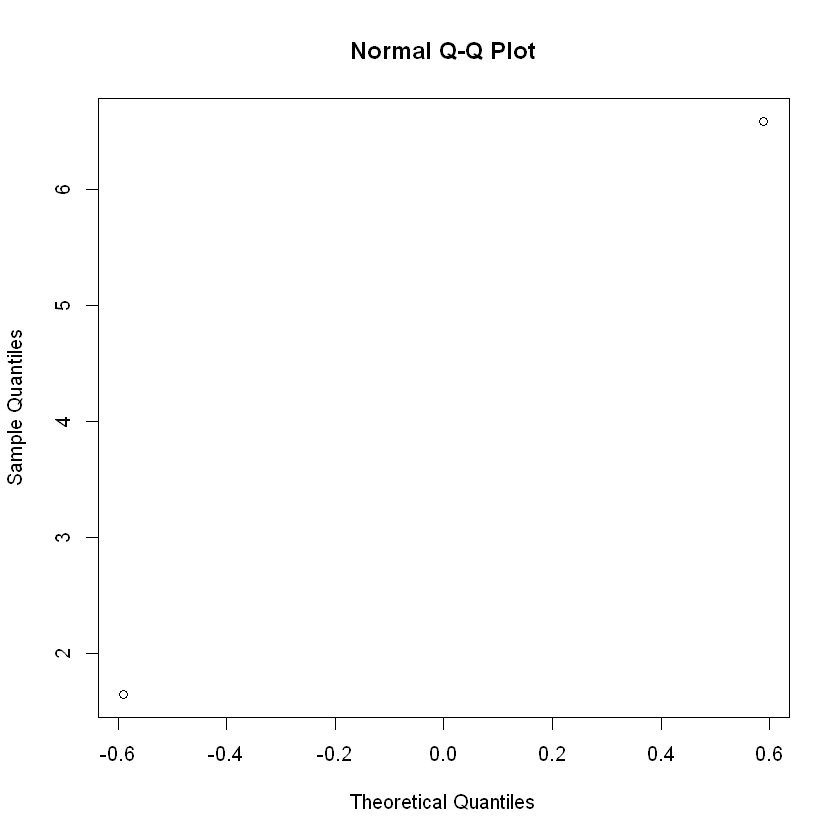

In [14]:
# Dignosis of model in qqnorm mothod
qqnorm(resid(lm))# checking linearity residuals of linear model
qqline(resid(lm)) # trying to fitting a line on the model made
qqnorm(fitted(lm)) # checking fittled 
qqline(fitted(lm)) # linear model fitting line
qqnorm(fitted.values(lm))# checking fitted values
qqline(fitted.values(lm))# checking fitted values
qqnorm(residuals(lm))# checking residials 
qqline(residuals(lm))# fitting line on residuals
qqnorm(effects(lm)) # effects of lm in quantiles
qqline(effects(lm)) # fitting line on effects
qqnorm(df.residual(lm)) # checking digree of freedom
qqnorm(coefficients(lm))# checking cofficnent point on lm. 


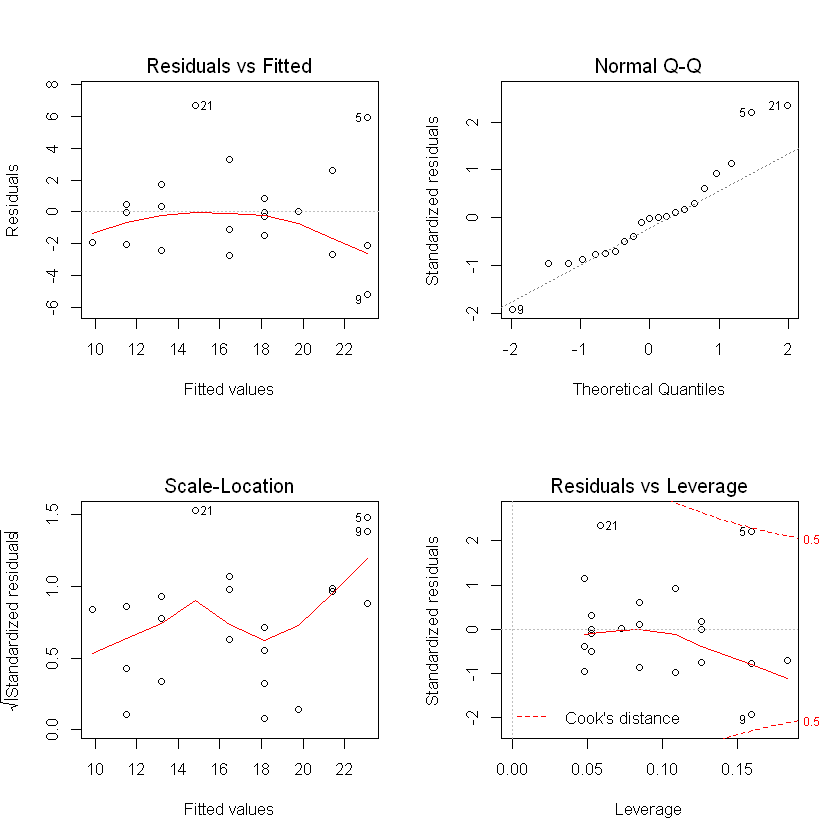

In [15]:
# dignostic plot togeather all need to increase size 
par(mfrow = c(2, 2))
plot(lm)


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'broom'


The following object is masked from 'package:modelr':

    bootstrap




Potentially influential observations of
	 lm(formula = Delivery_time ~ Sorting_time, data = del) :

   dfb.1_ dfb.Srt_ dffit   cov.r   cook.d hat  
5  -0.62   0.91     1.08_*  0.74    0.46   0.16
21  0.50  -0.29     0.67    0.60_*  0.17   0.06


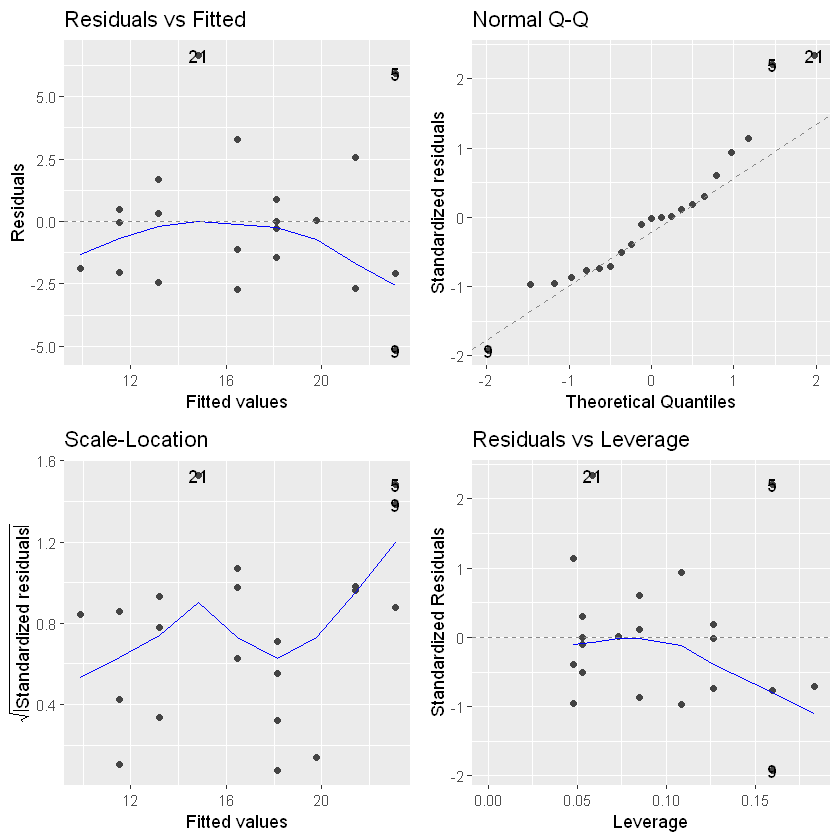

In [16]:
#dignostic plot togeather with outliers with autopilot
#install.packages("ggfortify")
# second method of dignostic plot ggplot 2 
library("tidyverse")
library("modelr")
library("broom")
library("ggfortify")
autoplot(lm)
summary(influence.measures(lm)) # we can have influence measure of cookr and hat value


Call:
lm(formula = Delivery_time ~ Sorting_time, data = del)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1729 -2.0298 -0.0298  0.8741  6.6722 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.5827     1.7217   3.823  0.00115 ** 
Sorting_time   1.6490     0.2582   6.387 3.98e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.935 on 19 degrees of freedom
Multiple R-squared:  0.6823,	Adjusted R-squared:  0.6655 
F-statistic:  40.8 on 1 and 19 DF,  p-value: 3.983e-06


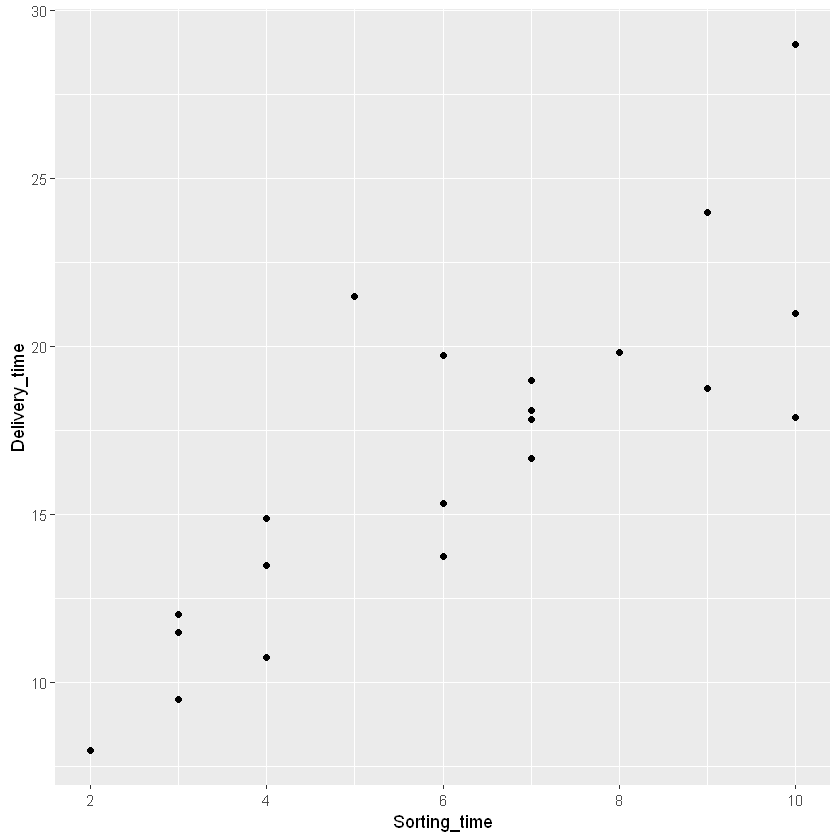

In [17]:
# adding regression line with ggplot2 A scattar plot 
ggplot(del,aes(x=Sorting_time,y=Delivery_time)) +geom_point()+geom_abline(intercept = -625.75236  ,slope =  0.42016 ,color ='red',size =.65 )# visualizsing geoom point 

summary(lm)

In [7]:
Y =  6.5827  + 1.6490 *8
Y

[1] 19.7747

In [18]:
# Data normality check
shapiro.test(Delivery_time) # Data is normal 
shapiro.test(Sorting_time) #  Data is normal



	Shapiro-Wilk normality test

data:  Delivery_time
W = 0.97813, p-value = 0.8963



	Shapiro-Wilk normality test

data:  Sorting_time
W = 0.93678, p-value = 0.1881


[1] 2.79165


Call:
lm(formula = Delivery_time ~ Sorting_time, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5126 -1.3138  0.4053  0.8973  3.7069 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.9878     1.8729   2.663   0.0287 *  
Sorting_time   2.0305     0.2836   7.159 9.63e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.473 on 8 degrees of freedom
Multiple R-squared:  0.865,	Adjusted R-squared:  0.8481 
F-statistic: 51.25 on 1 and 8 DF,  p-value: 9.625e-05


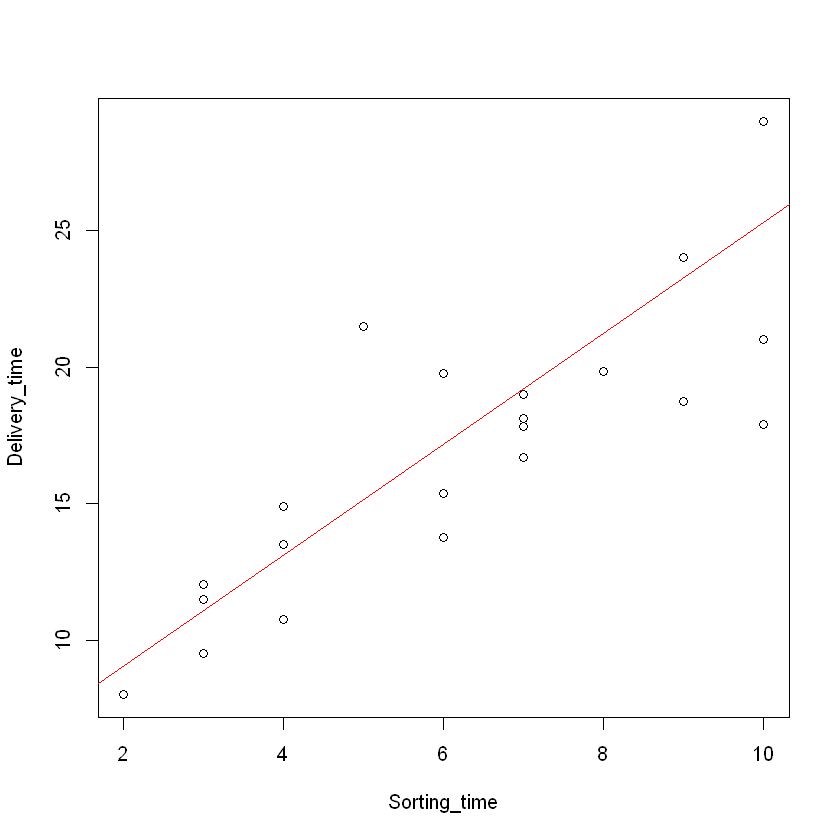

In [19]:
# lets make a linear model With training data set and test it 
# we trying to fit a linear regression line  by plotting linear model 
lm_train <- lm(Delivery_time~Sorting_time,data=train) # linear model
rmse_train <- sqrt(mean(lm$residuals^2))
rmse_train # priliminary model gives rmse 32 which is error is higher 
plot(Sorting_time, Delivery_time) # scatter plot X is Waist and y is AT
abline(lm(Delivery_time~Sorting_time,data = train),col = 'red') # made a regression line 
summary(lm_train)

In [20]:
confint(lm_train,level=0.95)
lm_res  <-  predict(lm_train, interval = "confidence")
lm_res
lm_ex_ploy  <- exp(lm_res)
lm_ex_ploy
err_ploy  <- lm_ex_ploy-Delivery_time
err_ploy
rmse  <- sqrt(mean(err_ploy^2))
rmse
residual  <-  lm_train$residuals
residual


,2.5 %,97.5 %
(Intercept),0.668989,9.306695
Sorting_time,1.376455,2.684598


,fit,lwr,upr
15,11.079421,8.414531,13.74431
19,9.048895,5.871427,12.22636
14,11.079421,8.414531,13.74431
3,17.171000,15.367849,18.97415
10,23.262579,20.597689,25.92747
2,13.109947,10.882260,15.33763
6,17.171000,15.367849,18.97415
11,21.232053,19.004366,23.45974
5,25.293105,22.115637,28.47057
4,23.262579,20.597689,25.92747


,fit,lwr,upr
15,6.482334e+04,4.512161e+03,9.312758e+05
19,8.509128e+03,3.547548e+02,2.040995e+05
14,6.482334e+04,4.512161e+03,9.312758e+05
3,2.865963e+07,4.722503e+06,1.739277e+08
10,1.267096e+10,8.819882e+08,1.820357e+11
2,4.938304e+05,5.322377e+04,4.581946e+06
6,2.865963e+07,4.722503e+06,1.739277e+08
11,1.663272e+09,1.792632e+08,1.543247e+10
5,9.652861e+10,4.024382e+09,2.315330e+12
4,1.267096e+10,8.819882e+08,1.820357e+11


Warning message in lm_ex_ploy - Delivery_time:
"longer object length is not a multiple of shorter object length"


,fit,lwr,upr
15,6.480234e+04,4.492331e+03,9.312543e+05
19,8.495628e+03,3.440048e+02,2.040785e+05
14,6.480359e+04,4.495481e+03,9.312623e+05
3,2.865960e+07,4.722491e+06,1.739277e+08
10,1.267096e+10,8.819882e+08,1.820357e+11
2,4.938150e+05,5.320889e+04,4.581917e+06
6,2.865961e+07,4.722489e+06,1.739277e+08
11,1.663272e+09,1.792632e+08,1.543247e+10
5,9.652861e+10,4.024382e+09,2.315330e+12
4,1.267096e+10,8.819882e+08,1.820357e+11


[1] 425712113179

15         19         14          3         10          2          6 
 0.9505789 -1.0488947  0.4205789  2.5790000 -4.5125789  0.3900526 -1.8210000 
        11          5          4 
-1.4020526  3.7068947  0.7374211

In [21]:
pred1  <- predict(lm_train,test) # prediction points and visualizaton below
pred1

1        7        8        9       12       13       16       17 
25.29311 19.20153 11.07942 25.29311 13.10995 19.20153 13.10995 17.17100 
      18       20       21 
19.20153 19.20153 15.14047

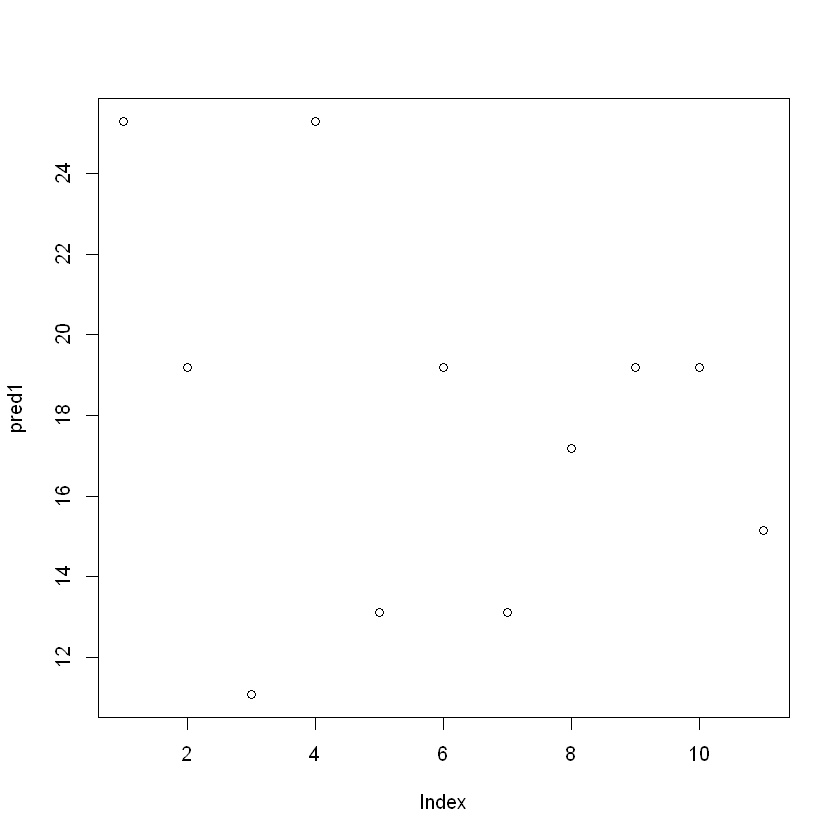

In [22]:
plot(pred1) # our prediction is working lets validate it 

In [23]:
pred  <- predict(lm_train,test) # predicting 10 values 
pred # after prediction we are checking 10 values 

1        7        8        9       12       13       16       17 
25.29311 19.20153 11.07942 25.29311 13.10995 19.20153 13.10995 17.17100 
      18       20       21 
19.20153 19.20153 15.14047

In [24]:
# K-10 Fold valdation model is ready
library(lattice)
library(caret) 

# Fit linear regression model
Kfoldmodel <- train(Delivery_time ~ Sorting_time, del,
                    method = "lm",
                    trControl = trainControl(
                      method = "cv", number = 10,
                      verboseIter = TRUE
                    )
) 

predicted <- predict(Kfoldmodel,del[0:10,]) 
predicted
del[0:10,]#he row predicted it worked AT is predicted 
#Evaluate error
actual <- del[0:10, "Delivery_time"]
err <-  sqrt(mean((predicted - actual)^2)) 
err

 #print the model
Kfoldmodel

summary(Kfoldmodel) # p value is too low so we rejecting this model




Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Aggregating results
Fitting final model on full training set


1        2        3        4        5        6        7        8 
23.07293 13.17881 16.47685 21.42391 23.07293 16.47685 18.12587 11.52979 
       9       10 
23.07293 21.42391

,Delivery_time,Sorting_time
,<dbl>,<int>
1,21.00,10
2,13.50,4
3,19.75,6
4,24.00,9
5,29.00,10
6,15.35,6
7,19.00,7
8,9.50,3
9,17.90,10


[1] 3.113568

Linear Regression 

21 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 18, 19, 19, 19, 19, 19, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  2.85648  0.9704223  2.483355

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1729 -2.0298 -0.0298  0.8741  6.6722 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.5827     1.7217   3.823  0.00115 ** 
Sorting_time   1.6490     0.2582   6.387 3.98e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.935 on 19 degrees of freedom
Multiple R-squared:  0.6823,	Adjusted R-squared:  0.6655 
F-statistic:  40.8 on 1 and 19 DF,  p-value: 3.983e-06


In [25]:
pred_train  <- predict(Kfoldmodel,train)
pred_train # the predicted values of train data 


15        19        14         3        10         2         6        11 
11.529794  9.880774 11.529794 16.476853 21.423913 13.178814 16.476853 19.774893 
        5         4 
23.072933 21.423913

In [26]:
pred_test  <- predict(Kfoldmodel,test)
pred_test # the predicted values of test data 

1        7        8        9       12       13       16       17 
23.07293 18.12587 11.52979 23.07293 13.17881 18.12587 13.17881 16.47685 
      18       20       21 
18.12587 18.12587 14.82783

[1] 0.8259973


Call:
lm(formula = Delivery_time ~ Sorting_time)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1729 -2.0298 -0.0298  0.8741  6.6722 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.5827     1.7217   3.823  0.00115 ** 
Sorting_time   1.6490     0.2582   6.387 3.98e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.935 on 19 degrees of freedom
Multiple R-squared:  0.6823,	Adjusted R-squared:  0.6655 
F-statistic:  40.8 on 1 and 19 DF,  p-value: 3.983e-06


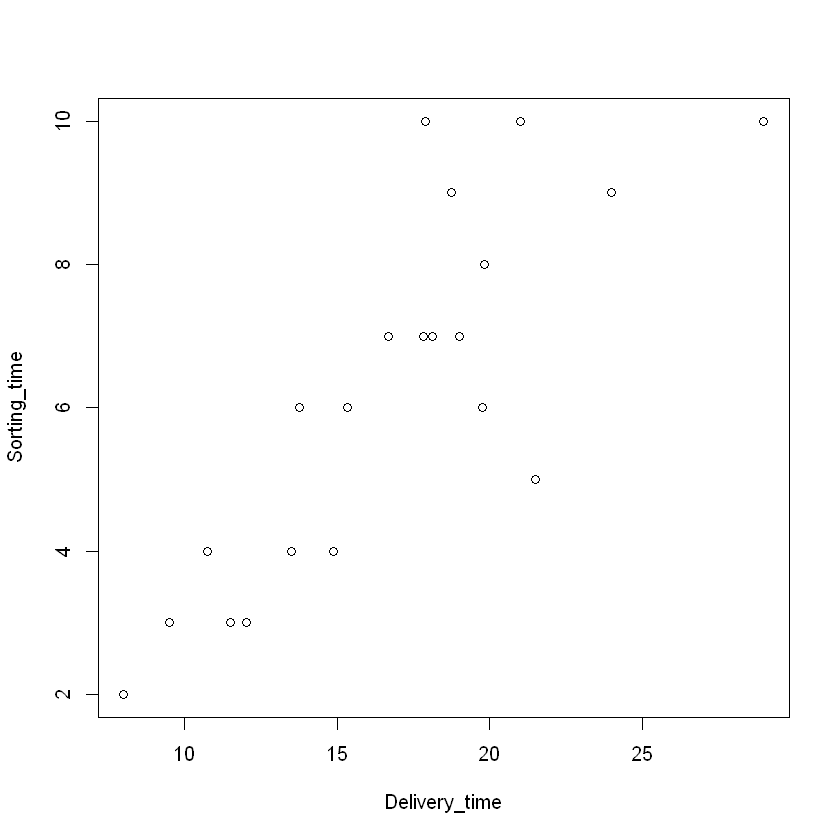

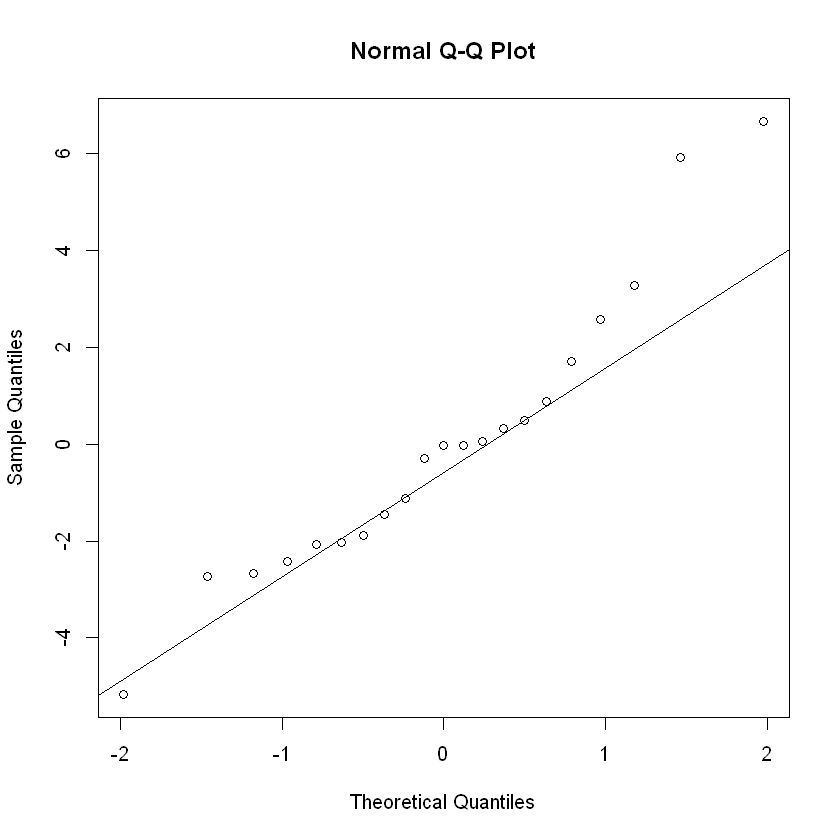

[1] 2.79165

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.792   2.792   2.792   2.792   2.792   2.792 

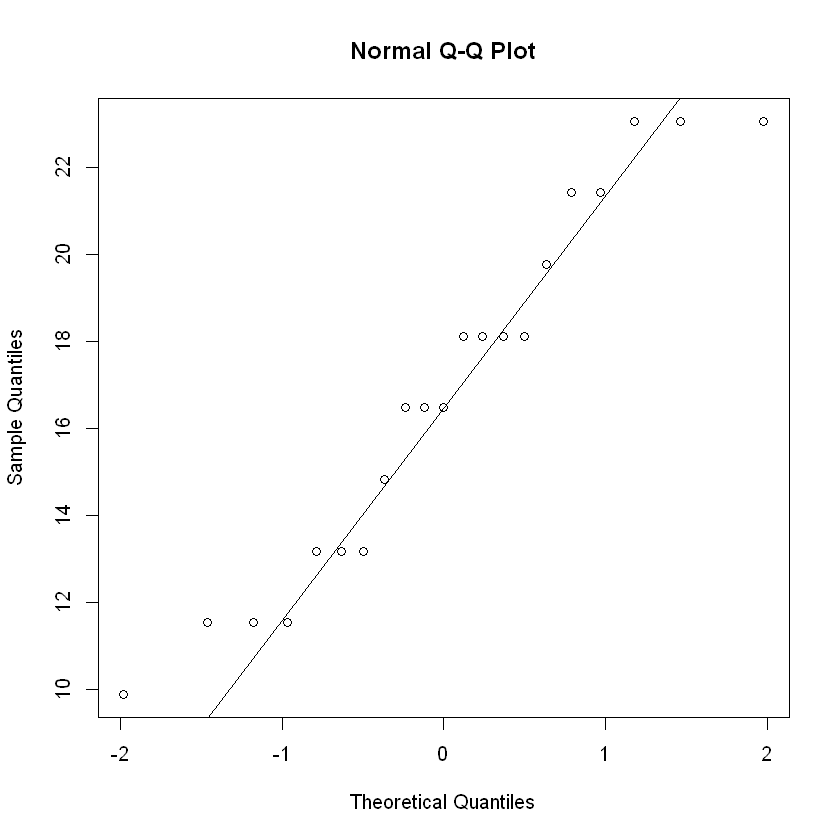

In [27]:
# Log model-1 # exponentioal model
plot( Delivery_time,Sorting_time) 
cor(Delivery_time,Sorting_time)# cor relation little bit improved 
lm_Sorting_time <- lm(Delivery_time ~ Sorting_time) # log transformation
summary(lm_Sorting_time) # after transformatin r square improved but not significant

qqnorm(resid(lm_Sorting_time)) # checking residual value its not a linear
qqline(resid(lm_Sorting_time)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Sorting_time)) # still it is not fitted values
qqline(fitted.values(lm_Sorting_time)) # still it is not fitted values

rmse_Sorting_time <- sqrt(mean(lm_Sorting_time$residuals^2))
rmse_Sorting_time # rmse not imporved , residual errors is large
summary(rmse_Sorting_time) # rmse need to imporved 

[1] 0.8431773


Call:
lm(formula = log(Delivery_time) ~ Sorting_time)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29209 -0.13364  0.02065  0.08421  0.41892 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.12137    0.10297  20.601 1.86e-14 ***
Sorting_time  0.10555    0.01544   6.836 1.59e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1755 on 19 degrees of freedom
Multiple R-squared:  0.7109,	Adjusted R-squared:  0.6957 
F-statistic: 46.73 on 1 and 19 DF,  p-value: 1.593e-06


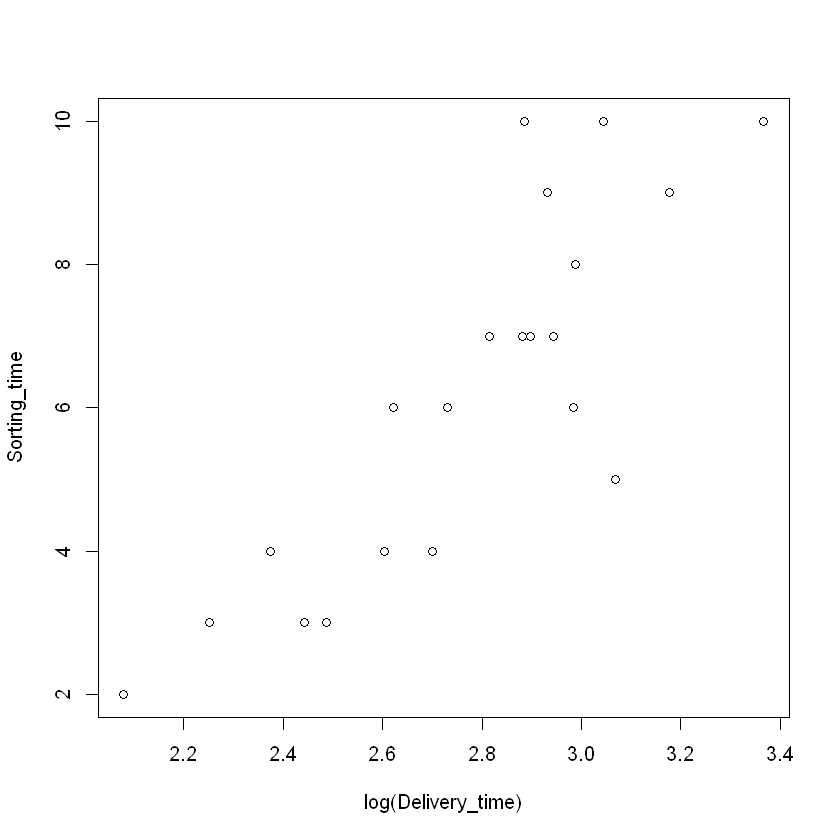

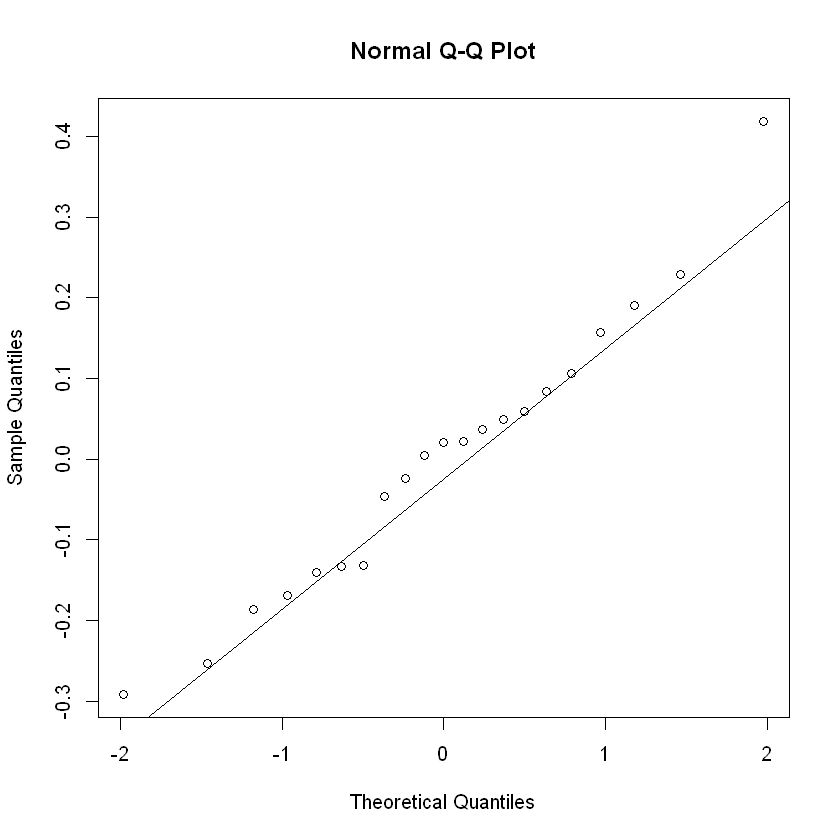

[1] 0.1669628

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.167   0.167   0.167   0.167   0.167   0.167 

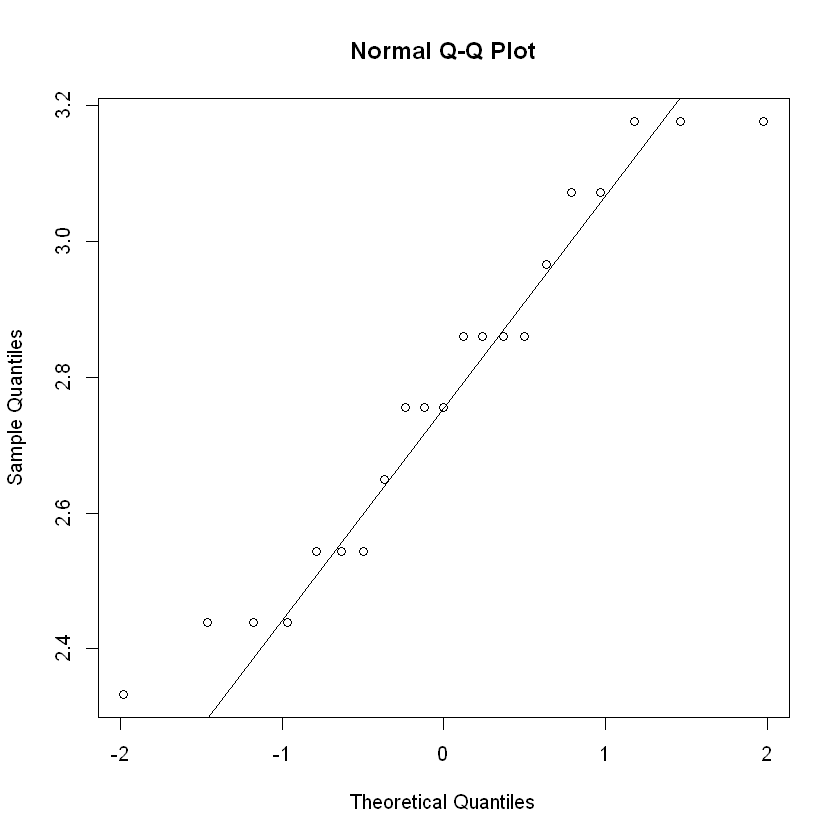

In [28]:
# log transformation  Exponential model 2 
# Log model-2 
plot(log(Delivery_time), Sorting_time) 
cor(log(Delivery_time), Sorting_time)
lm_Log_Delivery_time <-lm(log(Delivery_time) ~ Sorting_time) # log transformation

summary(lm_Log_Delivery_time) # after transformatin r square little bit improved but not find model

qqnorm(resid(lm_Log_Delivery_time)) # checking residual value its not a linear
qqline(resid(lm_Log_Delivery_time)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Log_Delivery_time)) # still it is not fitted values
qqline(fitted.values(lm_Log_Delivery_time)) # still it is not fitted values

rmse_Delivery_time <- sqrt(mean(lm_Log_Delivery_time$residuals^2))
rmse_Delivery_time # rmse  imporved 
summary(rmse_Delivery_time)